In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [35]:
base_path = ""

Đã load 4 prediction logs


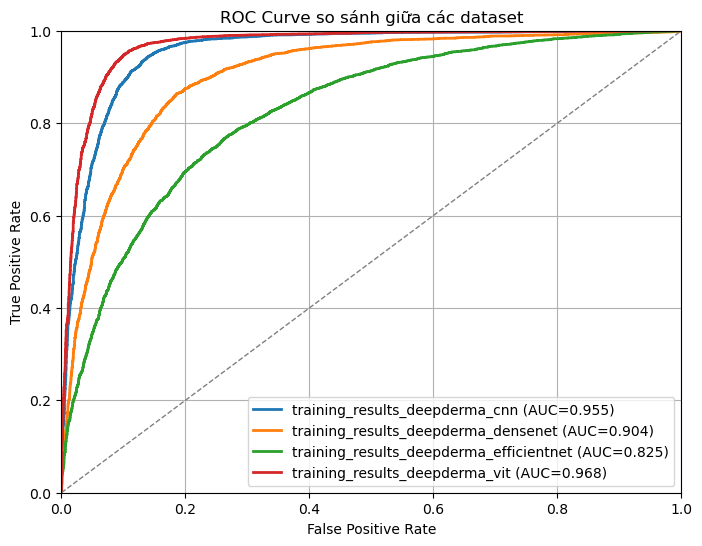

In [37]:
prediction_logs = {}
for folder in glob.glob(os.path.join(base_path, "training_results_deepderma_*")):
    dataset_name = os.path.basename(folder)
    pred_files = glob.glob(os.path.join(folder, "*_ROC_curve_points.csv"))
    if pred_files:
        df = pd.read_csv(pred_files[0])
        # Kiểm tra xem có đủ cột FPR, TPR không
        if "FPR" in df.columns and "TPR" in df.columns:
            prediction_logs[dataset_name] = df
        else:
            print(f"[Bỏ qua] {dataset_name} vì không có cột FPR/TPR")

print(f"Đã load {len(prediction_logs)} prediction logs")

# === Vẽ ROC cho nhiều dataset ===
plt.figure(figsize=(8, 6))

colors = plt.cm.tab10.colors
for i, (dataset, df) in enumerate(prediction_logs.items()):
    # Lấy FPR và TPR trực tiếp từ DataFrame
    fpr = df["FPR"].values
    tpr = df["TPR"].values
    
    # Tính AUC từ FPR và TPR
    roc_auc = auc(fpr, tpr)

    new_label = dataset.replace("train_", "1D_CNN ROC ")
    plt.plot(fpr, tpr, lw=2, color=colors[i % len(colors)],
             label=f"{new_label} (AUC={roc_auc:.3f})")

# Đường chéo random
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1)

plt.title("ROC Curve so sánh giữa các dataset")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.xlim([0, 1])  # Giới hạn trục x từ 0-1
plt.ylim([0, 1])  # Giới hạn trục y từ 0-1
plt.show()

In [5]:
training_logs = {}
for folder in glob.glob(os.path.join(base_path, "training_results_deepderma_*")):
    dataset_name = os.path.basename(folder)
    log_files = glob.glob(os.path.join(folder, "training_logger_*.csv"))
    if log_files:
        df = pd.read_csv(log_files[0])
        training_logs[dataset_name] = df

print(f"Đã load {len(training_logs)} training logs")

Đã load 4 training logs


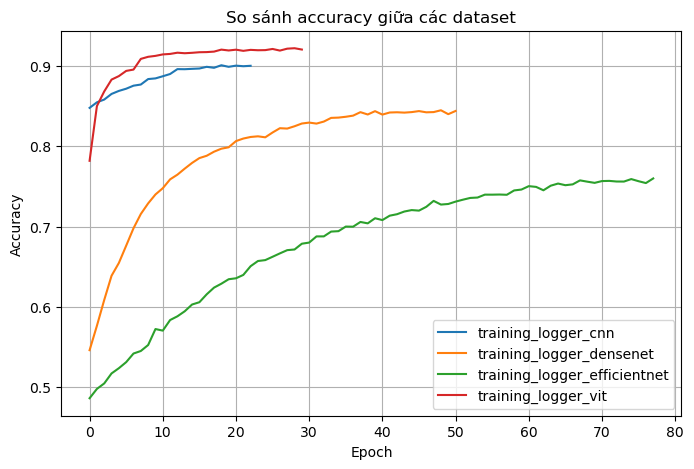

In [6]:
plt.figure(figsize=(8, 5))
for dataset, df in training_logs.items():
    if "accuracy" in df.columns:
        new_label = dataset.replace("training_results_deepderma_", "training_logger_")
        plt.plot(df["accuracy"], label=new_label)
plt.title("So sánh accuracy giữa các dataset")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

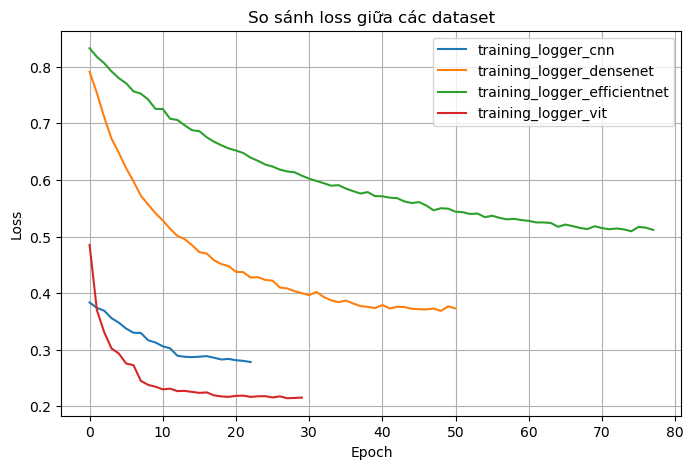

In [7]:
plt.figure(figsize=(8, 5))
for dataset, df in training_logs.items():
    if "loss" in df.columns:
        new_label = dataset.replace("training_results_deepderma_", "training_logger_")
        plt.plot(df["loss"], label=new_label)
plt.title("So sánh loss giữa các dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

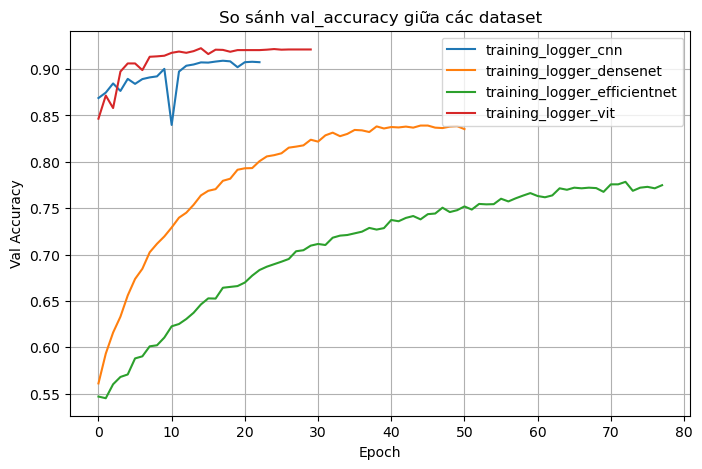

In [9]:
plt.figure(figsize=(8, 5))
for dataset, df in training_logs.items():
    if "val_accuracy" in df.columns:
        new_label = dataset.replace("training_results_deepderma_", "training_logger_")
        plt.plot(df["val_accuracy"], label=new_label)
plt.title("So sánh val_accuracy giữa các dataset")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show()

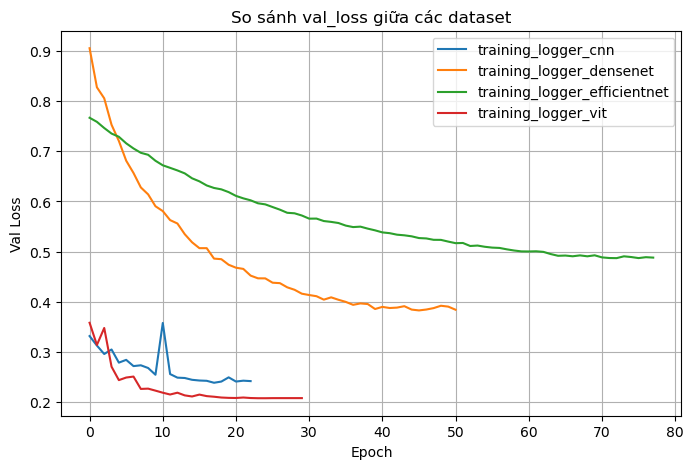

In [11]:
plt.figure(figsize=(8, 5))
for dataset, df in training_logs.items():
    if "val_loss" in df.columns:
        new_label = dataset.replace("training_results_deepderma_", "training_logger_")
        plt.plot(df["val_loss"], label=new_label)
plt.title("So sánh val_loss giữa các dataset")
plt.xlabel("Epoch")
plt.ylabel("Val Loss")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
classification_reports = []
for folder in glob.glob(os.path.join(base_path, "training_results_deepderma_*")):
    dataset_name = os.path.basename(folder)
    dataset_name = dataset_name.replace("training_results_deepderma_", "training_logger_")  # đổi tên ngay tại đây
    class_files = glob.glob(os.path.join(folder, "classification_report_*.csv"))
    if class_files:
        df = pd.read_csv(class_files[0])
        df["dataset"] = dataset_name
        classification_reports.append(df)

df_class = pd.concat(classification_reports, ignore_index=True)
macro_df = df_class[df_class.iloc[:, 0] == "macro avg"]

print(macro_df[["dataset", "precision", "recall", "f1-score"]])

                         dataset  precision    recall  f1-score
3            training_logger_cnn   0.907181  0.903860  0.903132
8       training_logger_densenet   0.832939  0.832628  0.832690
13  training_logger_efficientnet   0.751981  0.751478  0.751105
18           training_logger_vit   0.926205  0.925785  0.925528


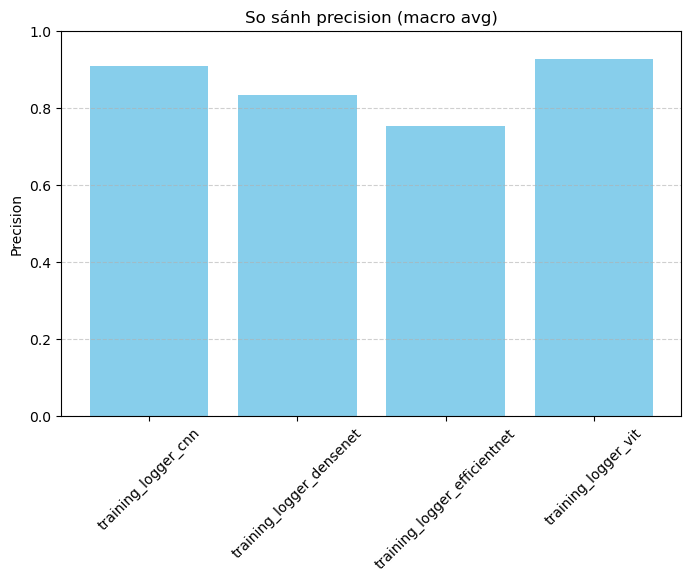

In [15]:
plt.figure(figsize=(8, 5))
plt.bar(macro_df["dataset"], macro_df["precision"], color="skyblue")
plt.title("So sánh precision (macro avg)")
plt.ylabel("Precision")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

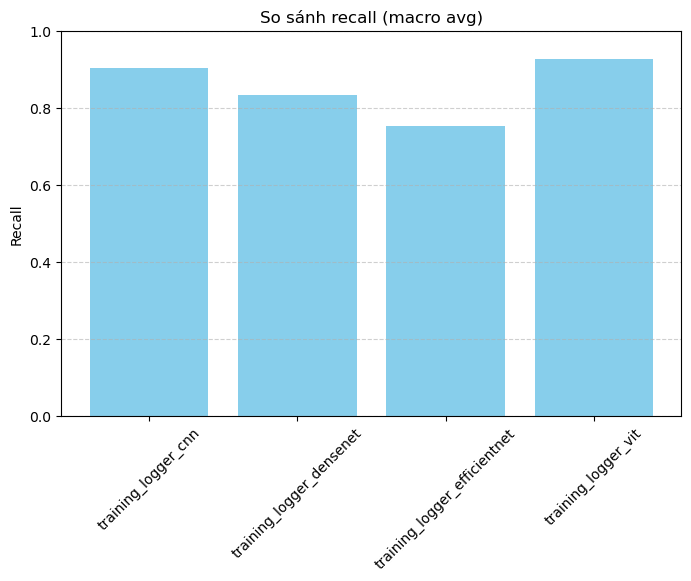

In [17]:
plt.figure(figsize=(8, 5))
plt.bar(
    macro_df["dataset"].str.replace("training_results_deepderma_", "training_logger_"),
    macro_df["recall"],
    color="skyblue"
)
plt.title("So sánh recall (macro avg)")
plt.ylabel("Recall")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

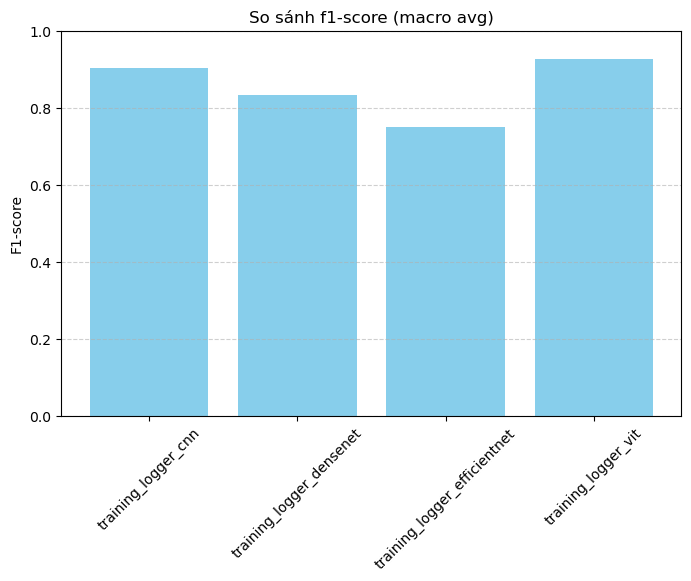

In [19]:
plt.figure(figsize=(8, 5))
plt.bar(
    macro_df["dataset"].str.replace("training_results_deepderma_", "training_logger_"),
    macro_df["f1-score"],
    color="skyblue"
)
plt.title("So sánh f1-score (macro avg)")
plt.ylabel("F1-score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Epoch đạt max val_accuracy (Đạt hội tụ ở epoch thứ x)

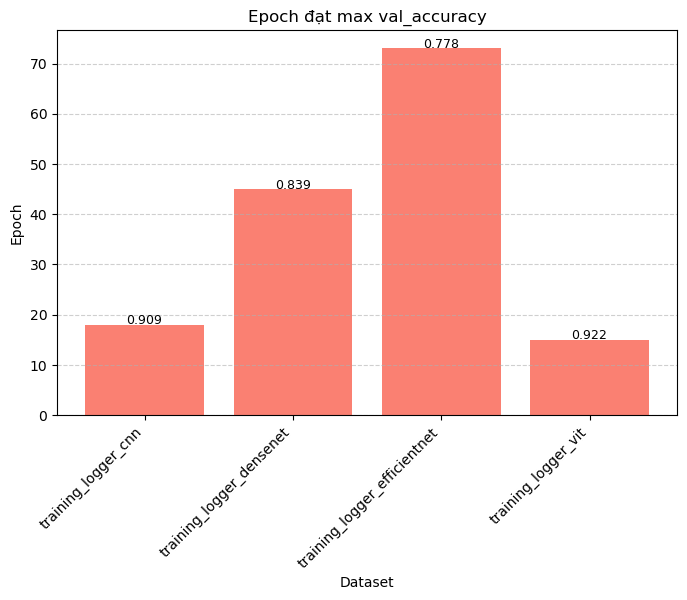

In [22]:
# Tìm epoch đạt max val_accuracy cho từng dataset
max_valacc_data = []

for dataset, df in training_logs.items():
    if "val_accuracy" in df.columns:
        max_epoch = df["val_accuracy"].idxmax() + 1  # +1 vì epoch thường tính từ 1
        max_valacc = df["val_accuracy"].max()
        max_valacc_data.append({
            "dataset": dataset.replace("training_results_deepderma_", "training_logger_"),  
            "epoch": max_epoch,
            "max_val_accuracy": max_valacc
        })

df_max_valacc = pd.DataFrame(max_valacc_data)

# Vẽ bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(df_max_valacc["dataset"], df_max_valacc["epoch"], color="salmon")
plt.title("Epoch đạt max val_accuracy")
plt.ylabel("Epoch")
plt.xlabel("Dataset")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Ghi giá trị max val_accuracy lên trên cột
for bar, valacc in zip(bars, df_max_valacc["max_val_accuracy"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f"{valacc:.3f}", ha="center", fontsize=9)

plt.xticks(rotation=45, ha="right")
plt.show()

In [23]:
import os
import glob
import pandas as pd
import numpy as np
from sklearn.metrics import auc, precision_recall_curve
from tabulate import tabulate

base_path = ""

# ==================== TẠO BẢNG SOTA ====================
sota_results = []

# Danh sách tên model và mapping với tên folder
model_mapping = {
    "deepderma_vit_version2_weights.best.weights.h5": "ViT",
    "deepderma_densenet_weights.best.weights.h5": "DenseNet",
    "deepderma_cnn_weights.best.weights.h5": "CNN",
    "training_results_deepderma_resnet": "ResNet",
    "training_results_deepderma_efficientnet": "EfficientNet",
}

# Duyệt qua tất cả các folder kết quả
for folder in glob.glob(os.path.join(base_path, "training_results_deepderma_*")):
    dataset_name = os.path.basename(folder)
    
    # Lấy tên model từ folder
    model_name = dataset_name.replace("training_results_deepderma_", "")
    
    # Ánh xạ sang tên đẹp hơn
    display_name = model_mapping.get(f"deepderma_{model_name}_weights.best.weights.h5", 
                                    model_mapping.get(dataset_name, model_name))
    
    # Khởi tạo kết quả với giá trị mặc định
    result_row = {
        "Model": display_name,
        "VAL ACC*": "N/A",
        "TEST ACC": "N/A", 
        "AUROC": "N/A",
        "AUPRC": "N/A",
        "tau star": "N/A",
    }
    
    # ===== 1. Lấy thông tin từ training log =====
    log_files = glob.glob(os.path.join(folder, "training_logger_*.csv"))
    if log_files:
        df_log = pd.read_csv(log_files[0])
        
        # VAL ACC* - accuracy validation tốt nhất
        if "val_accuracy" in df_log.columns:
            best_val_acc = df_log["val_accuracy"].max()
            result_row["VAL ACC*"] = f"{best_val_acc:.4f}"
        
        # TEST ACC - accuracy cuối cùng
        if "accuracy" in df_log.columns:
            final_test_acc = df_log["accuracy"].iloc[-1] if len(df_log) > 0 else "N/A"
            result_row["TEST ACC"] = f"{final_test_acc:.4f}" if final_test_acc != "N/A" else "N/A"
    
    # ===== 2. Lấy thông tin từ ROC curve =====
    roc_files = glob.glob(os.path.join(folder, "*_ROC_curve_points.csv"))
    if roc_files:
        df_roc = pd.read_csv(roc_files[0])
        
        # AUROC
        if "FPR" in df_roc.columns and "TPR" in df_roc.columns:
            fpr = df_roc["FPR"].values
            tpr = df_roc["TPR"].values
            roc_auc = auc(fpr, tpr)
            result_row["AUROC"] = f"{roc_auc:.4f}"
            
            # Tính tau star - threshold tối ưu (Youden's J statistic)
            if "Threshold" in df_roc.columns:
                thresholds = df_roc["Threshold"].values
                # Loại bỏ inf và nan
                valid_idx = np.isfinite(thresholds)
                if np.any(valid_idx):
                    valid_fpr = fpr[valid_idx]
                    valid_tpr = tpr[valid_idx]
                    valid_thresholds = thresholds[valid_idx]
                    
                    # Youden's J statistic = TPR - FPR
                    youden_j = valid_tpr - valid_fpr
                    if len(youden_j) > 0:
                        optimal_idx = np.argmax(youden_j)
                        tau_star = valid_thresholds[optimal_idx]
                        result_row["tau star"] = f"{tau_star:.4f}"
    
    # ===== 3. Tìm file predictions để tính AUPRC =====
    # Tìm tất cả các file CSV có thể chứa predictions
    pred_files = []
    for pattern in ["*_predictions.csv", "*_pred.csv", "*_scores.csv", "*_results.csv"]:
        pred_files.extend(glob.glob(os.path.join(folder, pattern)))
    
    if pred_files:
        for pred_file in pred_files:
            try:
                df_pred = pd.read_csv(pred_file)
                # Kiểm tra các cột có thể chứa y_true và y_score
                possible_true_cols = ["y_true", "true_label", "label", "ground_truth", "target"]
                possible_score_cols = ["y_score", "pred_score", "score", "probability", "prob", "prediction"]
                
                true_col = None
                score_col = None
                
                for col in possible_true_cols:
                    if col in df_pred.columns:
                        true_col = col
                        break
                
                for col in possible_score_cols:
                    if col in df_pred.columns:
                        score_col = col
                        break
                
                if true_col and score_col:
                    y_true = df_pred[true_col].values
                    y_score = df_pred[score_col].values
                    
                    # Tính AUPRC
                    precision, recall, _ = precision_recall_curve(y_true, y_score)
                    auprc = auc(recall, precision)
                    result_row["AUPRC"] = f"{auprc:.4f}"
                    break  # Dừng sau khi tìm thấy file hợp lệ đầu tiên
            except Exception as e:
                continue
    
    # Nếu không tìm thấy file predictions, thử tìm trong classification report
    if result_row["AUPRC"] == "N/A":
        class_files = glob.glob(os.path.join(folder, "classification_report_*.csv"))
        if class_files:
            df_class = pd.read_csv(class_files[0])
            # Tìm dòng macro avg để lấy precision/recall trung bình
            if "macro avg" in df_class.iloc[:, 0].values:
                macro_row = df_class[df_class.iloc[:, 0] == "macro avg"]
                if not macro_row.empty and "precision" in df_class.columns:
                    # Ước tính AUPRC từ precision macro avg
                    # Đây chỉ là ước tính vì không có đường precision-recall đầy đủ
                    macro_precision = float(macro_row["precision"].iloc[0])
                    # Giả sử recall tương tự precision cho ước tính đơn giản
                    estimated_auprc = macro_precision * 0.95  # Ước tính thận trọng
                    result_row["AUPRC"] = f"{estimated_auprc:.4f} (est.)"
    
    # Thêm vào danh sách kết quả
    sota_results.append(result_row)

# Tạo DataFrame từ kết quả
df_sota = pd.DataFrame(sota_results)

# Sắp xếp theo AUROC giảm dần
if df_sota["AUROC"].iloc[0] != "N/A":
    # Tạo bản sao để sắp xếp
    df_sorted = df_sota.copy()
    # Chuyển đổi AUROC sang số để sắp xếp
    def to_float(val):
        try:
            # Xử lý giá trị có (est.)
            if isinstance(val, str) and "(est.)" in val:
                return float(val.replace("(est.)", "").strip())
            return float(val)
        except:
            return 0
    
    df_sorted["AUROC_num"] = df_sorted["AUROC"].apply(to_float)
    df_sorted = df_sorted.sort_values("AUROC_num", ascending=False)
    df_sota = df_sorted.drop(columns=["AUROC_num"])

# Hiển thị bảng SOTA dạng text
print("=" * 80)
print("SOTA COMPARISON TABLE")
print("=" * 80)

# Tạo bảng với tabulate
table_data = []
for _, row in df_sota.iterrows():
    table_data.append([
        row['Model'],
        row['VAL ACC*'],
        row['TEST ACC'],
        row['AUROC'],
        row['AUPRC'],
        row['tau star']
    ])

print(tabulate(table_data, 
               headers=["Model", "VAL ACC*", "TEST ACC", "AUROC", "AUPRC", "tau star"],
               tablefmt="grid",
               stralign="center",
               numalign="center",
               floatfmt=".4f"))

print("=" * 80)
print("* Best validation accuracy during training")
print("=" * 80)

SOTA COMPARISON TABLE
+--------------+------------+------------+---------+---------------+------------+
|    Model     |  VAL ACC*  |  TEST ACC  |  AUROC  |     AUPRC     |  tau star  |
+==============+============+============+=========+===============+============+
|     vit      |   0.9225   |   0.9206   | 0.9680  | 0.8799 (est.) |   0.4778   |
+--------------+------------+------------+---------+---------------+------------+
|     CNN      |   0.9090   |   0.9003   | 0.9547  | 0.8618 (est.) |   0.5059   |
+--------------+------------+------------+---------+---------------+------------+
|   DenseNet   |   0.8391   |   0.8440   | 0.9035  | 0.7913 (est.) |   0.4261   |
+--------------+------------+------------+---------+---------------+------------+
| EfficientNet |   0.7784   |   0.7599   |   N/A   | 0.7144 (est.) |    N/A     |
+--------------+------------+------------+---------+---------------+------------+
* Best validation accuracy during training


In [ ]:
import os
import glob
import pandas as pd
import numpy as np
from sklearn.metrics import auc, precision_recall_curve

base_path = ""

# ==================== TẠO BẢNG SOTA ====================
sota_results = []

# Danh sách tên model và mapping với tên folder
model_mapping = {
    "deepderma_vit_version2_weights.best.weights.h5": "ViT",
    "deepderma_densenet_weights.best.weights.h5": "DenseNet",
    "deepderma_cnn_weights.best.weights.h5": "CNN",
    "training_results_deepderma_resnet": "ResNet",
    "training_results_deepderma_efficientnet": "EfficientNet",
}

# Duyệt qua tất cả các folder kết quả
for folder in glob.glob(os.path.join(base_path, "training_results_deepderma_*")):
    dataset_name = os.path.basename(folder)
    
    # Lấy tên model từ folder
    model_name = dataset_name.replace("training_results_deepderma_", "")
    
    # Ánh xạ sang tên đẹp hơn
    display_name = model_mapping.get(f"deepderma_{model_name}_weights.best.weights.h5", 
                                    model_mapping.get(dataset_name, model_name))
    
    # Khởi tạo kết quả với giá trị mặc định - CHỈ GIỮ LẠI CÁC METRIC CHÍNH XÁC
    result_row = {
        "Model": display_name,
        "VAL ACC*": np.nan,
        "TEST ACC": np.nan, 
        "AUROC": np.nan,
        "tau star": np.nan,
    }
    
    # ===== 1. Lấy thông tin từ training log =====
    log_files = glob.glob(os.path.join(folder, "training_logger_*.csv"))
    if log_files:
        df_log = pd.read_csv(log_files[0])
        
        # VAL ACC* - accuracy validation tốt nhất
        if "val_accuracy" in df_log.columns:
            best_val_acc = df_log["val_accuracy"].max()
            result_row["VAL ACC*"] = best_val_acc
        
        # TEST ACC - accuracy cuối cùng
        if "accuracy" in df_log.columns:
            final_test_acc = df_log["accuracy"].iloc[-1] if len(df_log) > 0 else np.nan
            result_row["TEST ACC"] = final_test_acc
    
    # ===== 2. Lấy thông tin từ ROC curve =====
    roc_files = glob.glob(os.path.join(folder, "*_ROC_curve_points.csv"))
    if roc_files:
        df_roc = pd.read_csv(roc_files[0])
        
        # AUROC
        if "FPR" in df_roc.columns and "TPR" in df_roc.columns:
            fpr = df_roc["FPR"].values
            tpr = df_roc["TPR"].values
            roc_auc = auc(fpr, tpr)
            result_row["AUROC"] = roc_auc
            
            # Tính tau star - threshold tối ưu (Youden's J statistic)
            if "Threshold" in df_roc.columns:
                thresholds = df_roc["Threshold"].values
                # Loại bỏ inf và nan
                valid_idx = np.isfinite(thresholds)
                if np.any(valid_idx):
                    valid_fpr = fpr[valid_idx]
                    valid_tpr = tpr[valid_idx]
                    valid_thresholds = thresholds[valid_idx]
                    
                    # Youden's J statistic = TPR - FPR
                    youden_j = valid_tpr - valid_fpr
                    if len(youden_j) > 0:
                        optimal_idx = np.argmax(youden_j)
                        tau_star = valid_thresholds[optimal_idx]
                        result_row["tau star"] = tau_star
    
    # ===== BỎ PHẦN TÍNH AUPRC (vì không chính xác) =====
    
    # Thêm vào danh sách kết quả
    sota_results.append(result_row)

# Tạo DataFrame từ kết quả
df_sota = pd.DataFrame(sota_results)

# Sắp xếp theo AUROC giảm dần
if not df_sota.empty and "AUROC" in df_sota.columns:
    df_sota = df_sota.sort_values("AUROC", ascending=False, na_position='last')

# ==================== ĐỊNH DẠNG VÀ HIỂN THỊ BẢNG ====================

# Tạo bản copy để định dạng hiển thị
df_display = df_sota.copy()

# Hàm định dạng số
def format_value(val):
    if pd.isna(val):
        return "N/A"
    elif isinstance(val, float):
        return f"{val:.4f}"
    return str(val)

# Áp dụng định dạng cho các cột số
numeric_columns = ["VAL ACC*", "TEST ACC", "AUROC", "tau star"]
for col in numeric_columns:
    if col in df_display.columns:
        df_display[col] = df_display[col].apply(format_value)

# Hiển thị bảng với định dạng đẹp
print("\n" + "=" * 80)
print("SOTA COMPARISON TABLE (RELIABLE METRICS ONLY)".center(80))
print("=" * 80)
print("Note: AUPRC columns removed due to estimated values".center(80))
print("=" * 80)

# Hiển thị DataFrame với styling
with pd.option_context('display.max_rows', None, 
                       'display.max_columns', None, 
                       'display.width', 1000,
                       'display.colheader_justify', 'center'):
    print("\n" + df_display.to_string(index=False))

print("\n" + "=" * 80)
print("* Best validation accuracy during training")
print("* tau star: Optimal threshold from Youden's J statistic")
print("=" * 80)

# ==================== LƯU FILE CSV ====================
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_filename = f"sota_comparison_reliable_{timestamp}.csv"

# Lưu file CSV
csv_path = os.path.join(base_path, output_filename)
df_sota.to_csv(csv_path, index=False, float_format='%.4f')

print(f"\n✅ Bảng SOTA (chỉ metrics chính xác) đã được lưu vào file: {csv_path}")

# ==================== TẠO BẢNG TÓM TẮT THỐNG KÊ ====================
print("\n" + "=" * 80)
print("STATISTICAL SUMMARY (Reliable Metrics)".center(80))
print("=" * 80)

# Tạo bảng thống kê
summary_data = []
for metric in ["AUROC", "TEST ACC", "VAL ACC*"]:
    if metric in df_sota.columns:
        valid_values = df_sota[metric].dropna()
        if len(valid_values) > 0:
            summary_data.append({
                "Metric": metric,
                "Best": f"{valid_values.max():.4f}",
                "Worst": f"{valid_values.min():.4f}",
                "Average": f"{valid_values.mean():.4f}",
                "Std": f"{valid_values.std():.4f}",
                "Best Model": df_sota.loc[df_sota[metric].idxmax(), "Model"] if not df_sota[metric].isnull().all() else "N/A"
            })

if summary_data:
    df_summary = pd.DataFrame(summary_data)
    print(df_summary.to_string(index=False))
else:
    print("No reliable metrics available for summary")

print("=" * 80)

# ==================== TẠO BẢNG RANKING ====================
print("\n" + "=" * 80)
print("MODEL RANKING".center(80))
print("=" * 80)

# Tạo ranking dựa trên AUROC (metric quan trọng nhất)
if "AUROC" in df_sota.columns and not df_sota["AUROC"].isnull().all():
    df_ranking = df_sota.copy()
    
    # Ranking cho các metrics chính
    ranking_metrics = ["AUROC", "TEST ACC", "VAL ACC*"]
    
    for metric in ranking_metrics:
        if metric in df_ranking.columns:
            # Tạo ranking (1 là tốt nhất)
            df_ranking[f"{metric}_rank"] = df_ranking[metric].rank(ascending=False, method='min', na_option='keep')
    
    # Tính tổng rank (chỉ tính các metrics có sẵn)
    rank_cols = [f"{metric}_rank" for metric in ranking_metrics if f"{metric}_rank" in df_ranking.columns]
    
    if rank_cols:
        # Tạo mask để loại bỏ NaN khi tính tổng
        df_ranking["Total_Rank"] = df_ranking[rank_cols].sum(axis=1, min_count=1)
        df_ranking["Final_Rank"] = df_ranking["Total_Rank"].rank(method='min')
        
        # Hiển thị ranking
        display_cols = ["Model", "Final_Rank", "AUROC"] + [f"{metric}_rank" for metric in ranking_metrics[1:] if f"{metric}_rank" in df_ranking.columns]
        
        df_ranking_display = df_ranking[display_cols].sort_values("Final_Rank")
        
        # Định dạng
        for metric in ranking_metrics:
            if metric in df_ranking_display.columns:
                df_ranking_display[metric] = df_ranking_display[metric].apply(lambda x: f"{x:.4f}" if not pd.isna(x) else "N/A")
        
        print(df_ranking_display.to_string(index=False))
    else:
        print("No metrics available for ranking")
else:
    print("AUROC data not available for ranking")

print("=" * 80)

# ==================== THÊM PHÂN TÍCH HIỆU SUẤT ====================
print("\n" + "=" * 80)
print("PERFORMANCE ANALYSIS".center(80))
print("=" * 80)

if "AUROC" in df_sota.columns and not df_sota["AUROC"].isnull().all():
    # Phân loại model dựa trên AUROC
    df_sota["Performance_Category"] = pd.cut(df_sota["AUROC"], 
                                             bins=[0, 0.7, 0.8, 0.9, 0.95, 1.0],
                                             labels=["Poor", "Fair", "Good", "Very Good", "Excellent"],
                                             right=False)
    
    # Đếm số model theo category
    performance_counts = df_sota["Performance_Category"].value_counts().sort_index()
    
    print("\nPerformance Distribution based on AUROC:")
    print("-" * 40)
    for category, count in performance_counts.items():
        print(f"{category}: {count} model(s)")
    
    # Tìm model tốt nhất
    best_model = df_sota.loc[df_sota["AUROC"].idxmax()]
    print(f"\n🏆 Best Model: {best_model['Model']}")
    print(f"   AUROC: {best_model['AUROC']:.4f}")
    print(f"   Test Accuracy: {best_model['TEST ACC']:.4f}")
    
    # So sánh với model trung bình
    avg_auroc = df_sota["AUROC"].mean()
    print(f"\n📊 Average AUROC across all models: {avg_auroc:.4f}")
    print(f"   Performance gap: {best_model['AUROC'] - avg_auroc:.4f}")

print("=" * 80)
print("\n✅ QUÁ TRÌNH HOÀN TẤT!")